### Individual Assignment 5: Data Visualization

### Background Info

After diving into the sales data for WaterPro’s WaterCure product, I’ve got a pretty good grip on how things are shaping up. Since the company rep isn’t super familiar with Python or data analysis, I’ll keep it simple by using visuals to explain how I reached these conclusions. The idea is to show sales trends and key insights through clear and easy-to-understand charts and graphs

In [114]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df_daily_sales = pd.read_csv ('daily_sales.csv',skiprows = 2)

In [39]:
df_daily_sales.head()

,Date,Daily Units Sold,Daily Unit Price,Daily Temperature (C)
0,1/1/2024,91,24.0,25
1,1/2/2024,90,24.0,24
2,1/3/2024,70,24.0,19
3,1/4/2024,89,24.0,23
4,1/5/2024,100,24.0,36


In [47]:
df_daily_sales.columns

Index(['Date', 'Daily Units Sold', 'Daily Unit Price', 'Daily Temperature (C)',
       'Month'],
      dtype='object')

**1.The correlation relationship between the sales performance and the temperature using both daily data and monthly data (hint: do you use the same type of visualization for daily data visualization and monthly data visualization?)**

**Line Plot for Daily Data:**
* The line plot for daily data shows both the units sold and temperature trends over time, capturing daily variations.

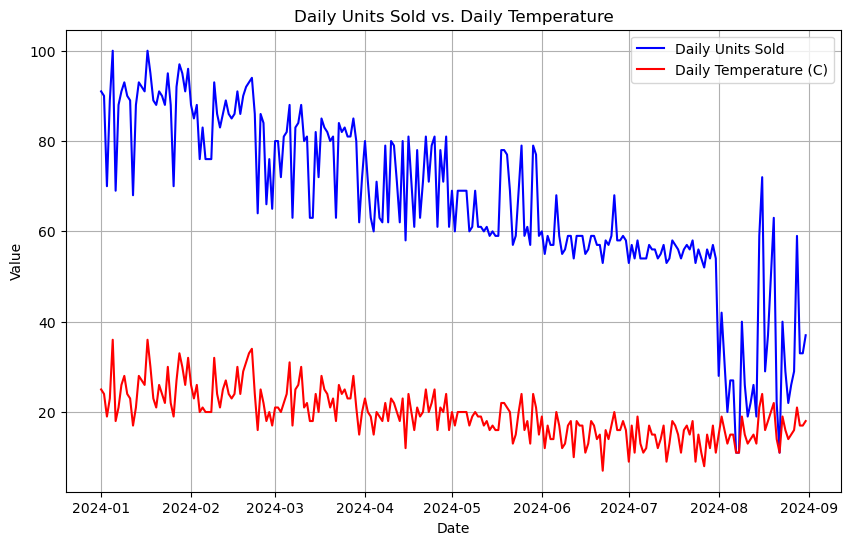

In [41]:
# Clean up the data and rename columns
df_daily_sales.columns = ['Date', 'Daily Units Sold', 'Daily Unit Price', 'Daily Temperature (C)']
df_daily_sales = df_daily_sales[df_daily_sales['Date'] != 'Date']
df_daily_sales['Date'] = pd.to_datetime(df_daily_sales['Date'])

# Convert relevant columns to numeric
df_daily_sales['Daily Units Sold'] = pd.to_numeric(df_daily_sales['Daily Units Sold'])
df_daily_sales['Daily Temperature (C)'] = pd.to_numeric(df_daily_sales['Daily Temperature (C)'])

# Line plot for daily data
plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales['Date'], df_daily_sales['Daily Units Sold'], label='Daily Units Sold', color='b')
plt.plot(df_daily_sales['Date'], df_daily_sales['Daily Temperature (C)'], label='Daily Temperature (C)', color='r')
plt.title('Daily Units Sold vs. Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


**Bar Plot for Monthly Data:**
* The bar plot for monthly data provides a clearer view of the average values per month, helping to understand the general trends without daily fluctuations.

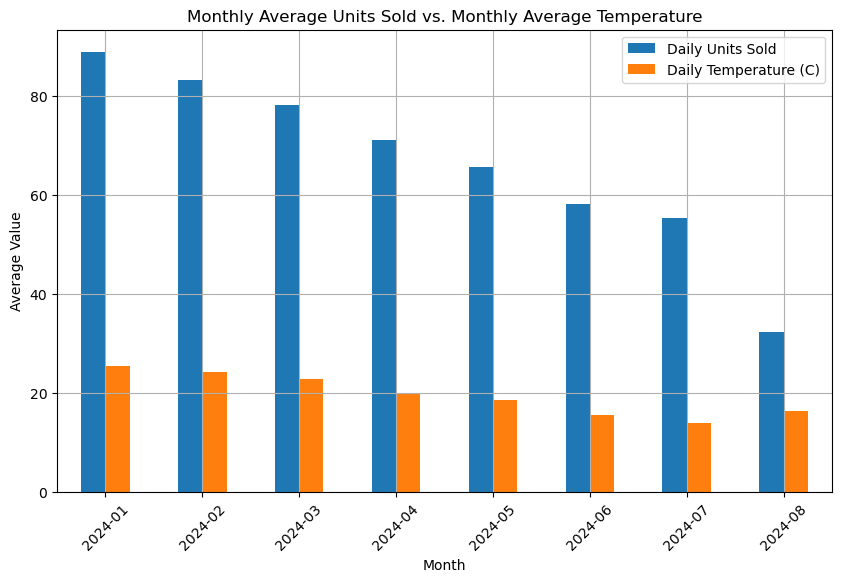

In [43]:
# Add a new column for the month and year
df_daily_sales['Month'] = df_daily_sales['Date'].dt.to_period('M')

# Group by month and calculate the mean for 'Daily Units Sold' and 'Daily Temperature (C)'
df_monthly_sales = df_daily_sales.groupby('Month').mean()[['Daily Units Sold', 'Daily Temperature (C)']]

# Bar plot for monthly data
df_monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Average Units Sold vs. Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**2. the average customer rating for each month**

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

df_ratings = pd.read_csv('Hsieh_Luna_sentiment.csv')

In [122]:
df_ratings.head()

,Reviewer Name,Review Date,Rating,Review Text,sentiment,YearMonth
0,Owen White,2023-01-01,3,"The product meets basic needs, but that's abou...",neutral,2023-01
1,Bob Jenkins,2023-01-02,5,"Very satisfied with this product, excellent qu...",positive,2023-01
2,Rachel Harris,2023-01-03,1,This product didn't meet my expectations; I wa...,negative,2023-01
3,Olivia Clark,2023-01-04,1,"I had issues with bottles leaking, very dissat...",negative,2023-01
4,Violet Thompson,2023-01-05,1,This product didn't meet my expectations; I wa...,negative,2023-01


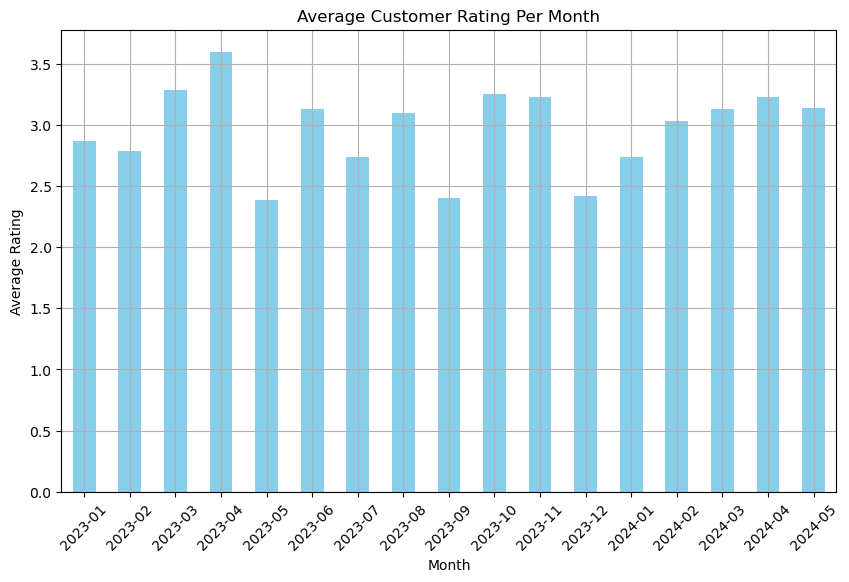

In [97]:
# Convert 'Review Date' and 'YearMonth' to datetime format, and 'Rating' to numeric
df_ratings['Review Date'] = pd.to_datetime(df_ratings['Review Date'])
df_ratings['Rating'] = pd.to_numeric(df_ratings['Rating'])
df_ratings['YearMonth'] = pd.to_datetime(df_ratings['YearMonth'], format='%Y-%m').dt.to_period('M')

# Group by 'YearMonth' and calculate the mean for only the 'Rating' column
df_monthly_ratings = df_ratings.groupby('YearMonth')['Rating'].mean()

# Plot the average customer rating per month
plt.figure(figsize=(10, 6))
df_monthly_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Customer Rating Per Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**3. The distribution of customer reviews' sentiment polarity in the collected data**

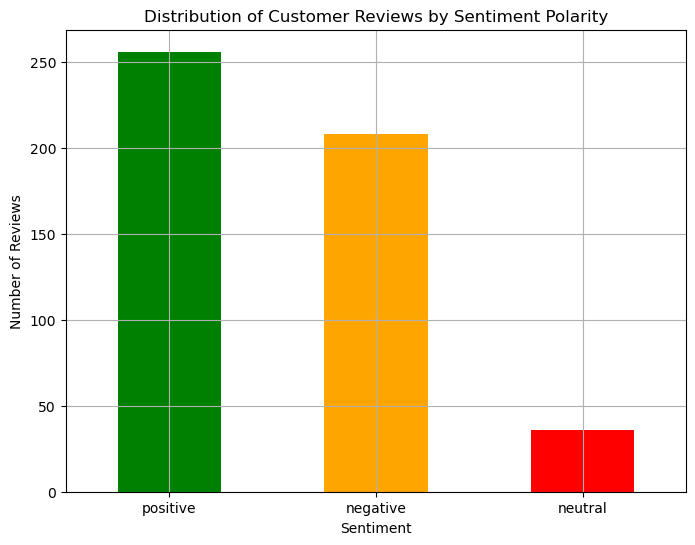

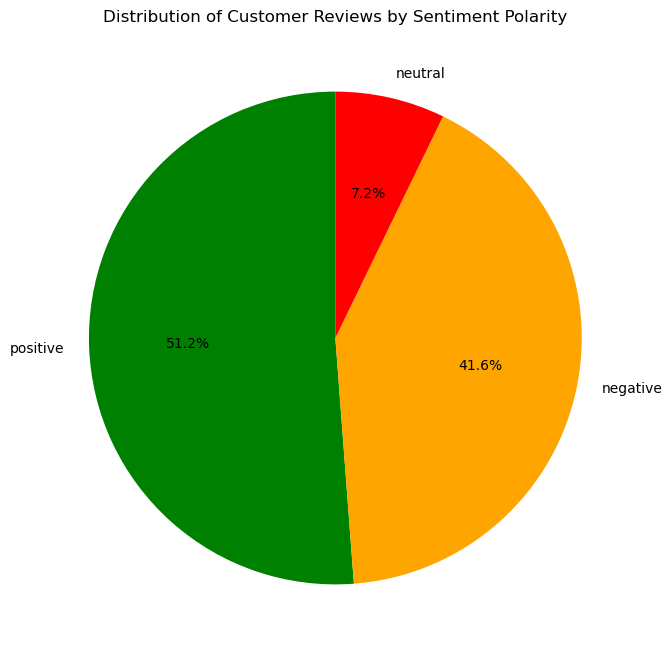

In [101]:
# Count the occurrences of each sentiment category
sentiment_counts = df_ratings['sentiment'].value_counts()

# Plot the distribution of sentiment polarity using a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Customer Reviews by Sentiment Polarity')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plot the distribution of sentiment polarity using a pie chart 
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'], startangle=90)
plt.title('Distribution of Customer Reviews by Sentiment Polarity')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.show()

**Explanation:**
* Bar Chart: Displays the count of reviews for each sentiment category (positive, neutral, negative).
* Pie Chart: Shows the percentage distribution of customer sentiments in the dataset.

**4. Word cloud of customers' reviews from three categories: positive, neutral, and negative**

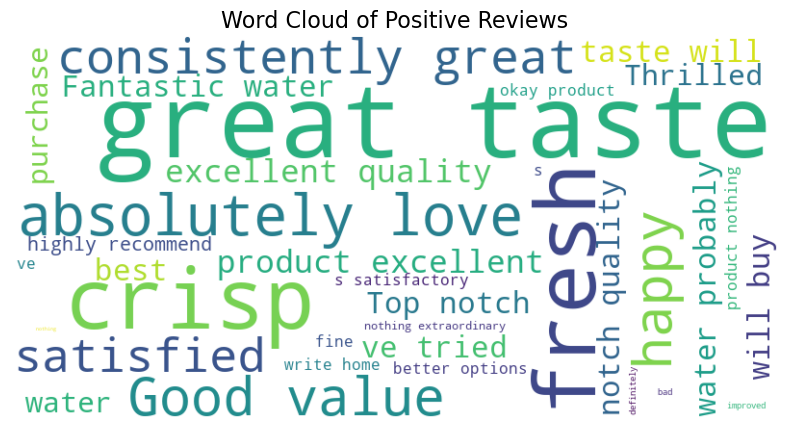

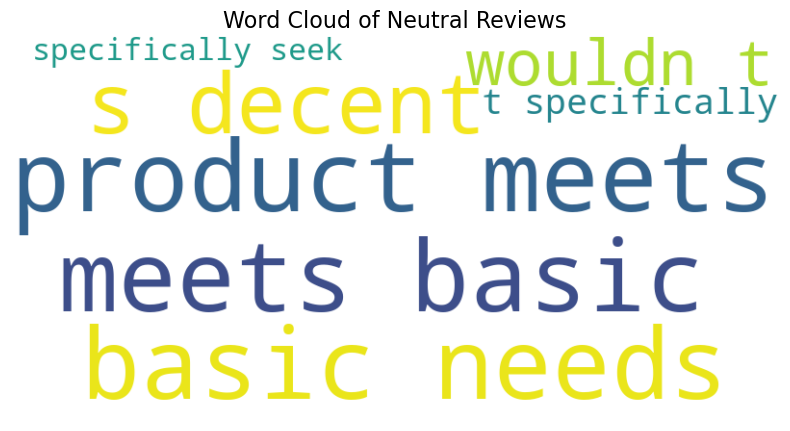

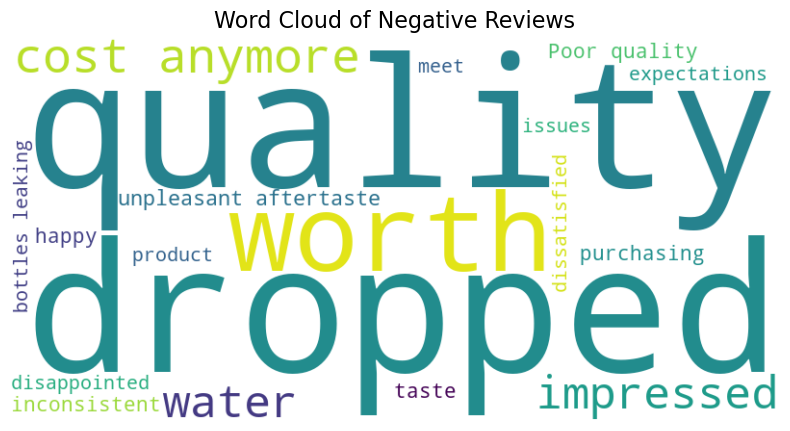

In [120]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Filter the reviews using sentiment category
positive_reviews = " ".join(df_ratings[df_ratings['sentiment'] == 'positive']['Review Text'])
neutral_reviews = " ".join(df_ratings[df_ratings['sentiment'] == 'neutral']['Review Text'])
negative_reviews = " ".join(df_ratings[df_ratings['sentiment'] == 'negative']['Review Text'])

# Word clouds for each sentiment category
generate_wordcloud(positive_reviews, 'Word Cloud of Positive Reviews')
generate_wordcloud(neutral_reviews, 'Word Cloud of Neutral Reviews')
generate_wordcloud(negative_reviews, 'Word Cloud of Negative Reviews')